In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer, StandardScaler, Normalizer, MinMaxScaler
from sklearn import svm

# Plot two ingredients
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

# Pickle package
import pickle
df = pd.read_csv('Data\Data.csv')
df

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL,SOURCEURL.1
0,227193357,20130102,201301,2013,2013.0055,HLH,DOCTOR,NaN,NaN,NaN,...,4,"Pondok Indah, Jawa Timur, Indonesia",ID,ID08,-7.312800,112.7010,10290679,20130203,unspecified,2013
1,227193358,20130102,201301,2013,2013.0055,HLH,DOCTOR,NaN,NaN,NaN,...,4,"Pondok Indah, Jawa Timur, Indonesia",ID,ID08,-7.312800,112.7010,10290679,20130203,unspecified,2013
2,227643172,20130108,201301,2013,2013.0219,HLH,DOCTOR,NaN,NaN,NaN,...,4,"Makassar, (ID20), Indonesia",ID,ID20,-5.140000,119.4220,-2701828,20130203,unspecified,2013
3,227643173,20130108,201301,2013,2013.0219,HLH,DOCTOR,NaN,NaN,NaN,...,4,"Merpati, Irian Jaya Barat, Indonesia",ID,ID39,-0.659167,130.5910,289164,20130203,unspecified,2013
4,227848083,20130110,201301,2013,2013.0274,IDNGOVHLH,AGUNG LAKSONO,IDN,NaN,NaN,...,4,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.174440,106.8290,-2679652,20130203,unspecified,2013
5,228867114,20130122,201301,2013,2013.0603,COPHLH,NATIONAL POLICE,NaN,NaN,NaN,...,4,"Kramat, Jawa Timur, Indonesia",ID,ID08,-8.131100,113.4500,10681851,20130203,unspecified,2013
6,228889325,20130122,201301,2013,2013.0603,GOVHLH,MINIST OF HEALTH,NaN,NaN,NaN,...,4,"Semarang, Jawa Tengah, Indonesia",ID,ID07,-6.993200,110.4200,-2696070,20130203,unspecified,2013
7,228890521,20130122,201301,2013,2013.0603,HLH,PHYSICIAN,NaN,NaN,NaN,...,4,"Semarang, Jawa Tengah, Indonesia",ID,ID07,-6.993200,110.4200,-2696070,20130203,unspecified,2013
8,228891601,20130122,201301,2013,2013.0603,IDNHLH,INDONESIA,IDN,NaN,NaN,...,4,"Kramat, Jawa Timur, Indonesia",ID,ID08,-8.131100,113.4500,10681851,20130203,unspecified,2013
9,228913309,20130122,201301,2013,2013.0603,NGOHLHIRC,RED CROSS,NaN,IRC,NaN,...,4,"Pluit, Jakarta Raya, Indonesia",ID,ID04,-6.119170,106.7890,-2692710,20130203,unspecified,2013


In [65]:
df.groupby('DATEADDED').count().sort_values(['GLOBALEVENTID'], ascending=False).head(5)

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,SOURCEURL,SOURCEURL.1
DATEADDED,,,,,,,,,,,,,,,,,,,,,
20150630,19,19,19,19,19,19,19,9,0,0,...,19,19,19,19,19,19,19,19,19,19
20150101,16,16,16,16,16,16,16,16,0,0,...,16,16,16,16,16,16,16,16,16,16
20130203,12,12,12,12,12,12,12,2,3,0,...,12,12,12,12,12,12,12,12,12,12
20170525,12,12,12,12,12,12,12,3,0,0,...,12,12,12,12,12,12,12,12,12,12
20161208,11,11,11,11,11,11,11,0,0,0,...,11,11,11,11,11,11,11,11,11,11


In [2]:
cek = pd.DataFrame(df, columns = ['IsRootEvent','EventCode','EventBaseCode','EventRootCode','QuadClass','GoldsteinScale','NumMentions','NumSources','NumArticles','AvgTone'
])
cek.describe()

,IsRootEvent,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,0.641026,119.604167,57.014423,5.517628,1.525641,1.824199,16.157051,2.666667,15.884615,-1.202147
std,0.480085,220.997844,41.117201,4.101404,0.832322,3.859562,89.735679,9.277137,88.430816,4.035430
min,0.000000,10.000000,10.000000,1.000000,1.000000,-10.000000,1.000000,1.000000,1.000000,-13.122172
25%,0.000000,31.750000,31.000000,3.000000,1.000000,0.000000,2.000000,1.000000,2.000000,-4.332844
50%,1.000000,43.000000,43.000000,4.000000,1.000000,1.900000,5.000000,1.000000,5.000000,-0.417944
75%,1.000000,90.000000,84.000000,8.000000,2.000000,4.000000,10.000000,1.000000,10.000000,1.694915
max,1.000000,1043.000000,193.000000,19.000000,4.000000,10.000000,1711.000000,151.000000,1671.000000,10.204082


ValueError: DataFrame constructor not properly called!

In [90]:
Data = pd.DataFrame(df, columns = ['NumMentions','NumSources','NumArticles'])

In [14]:
cek.quantile([0.25,0.5,0.75])

,IsRootEvent,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone
0.25,0.0,31.75,31.0,3.0,1.0,0.0,2.0,1.0,2.0,-4.332844
0.50,1.0,43.00,43.0,4.0,1.0,1.9,5.0,1.0,5.0,-0.417944
0.75,1.0,90.00,84.0,8.0,2.0,4.0,10.0,1.0,10.0,1.694915


In [19]:
np.percentile(cek.NumMentions,25), np.percentile(cek.NumMentions,75)

(2.0, 10.0)

In [91]:
Data.var()

NumMentions    8052.492149
NumSources       86.065276
NumArticles    7820.009137
dtype: float64

In [92]:
Data.std()

NumMentions    89.735679
NumSources      9.277137
NumArticles    88.430816
dtype: float64

In [22]:
   cek.mean()

IsRootEvent         0.641026
EventCode         119.604167
EventBaseCode      57.014423
EventRootCode       5.517628
QuadClass           1.525641
GoldsteinScale      1.824199
NumMentions        16.157051
NumSources          2.666667
NumArticles        15.884615
AvgTone            -1.202147
dtype: float64

In [26]:
cek.mode()

,IsRootEvent,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone
0,1,42,42,4,1,1.9,4,1,4,0.0


In [28]:
cek.max()

IsRootEvent          1.000000
EventCode         1043.000000
EventBaseCode      193.000000
EventRootCode       19.000000
QuadClass            4.000000
GoldsteinScale      10.000000
NumMentions       1711.000000
NumSources         151.000000
NumArticles       1671.000000
AvgTone             10.204082
dtype: float64

In [29]:
cek.min()

IsRootEvent        0.000000
EventCode         10.000000
EventBaseCode     10.000000
EventRootCode      1.000000
QuadClass          1.000000
GoldsteinScale   -10.000000
NumMentions        1.000000
NumSources         1.000000
NumArticles        1.000000
AvgTone          -13.122172
dtype: float64

In [30]:
cek.median()

IsRootEvent        1.000000
EventCode         43.000000
EventBaseCode     43.000000
EventRootCode      4.000000
QuadClass          1.000000
GoldsteinScale     1.900000
NumMentions        5.000000
NumSources         1.000000
NumArticles        5.000000
AvgTone           -0.417944
dtype: float64

In [33]:
# interquartile
test = cek.quantile(0.75)-cek.quantile(0.25)
test

IsRootEvent        1.000000
EventCode         58.250000
EventBaseCode     53.000000
EventRootCode      5.000000
QuadClass          1.000000
GoldsteinScale     4.000000
NumMentions        8.000000
NumSources         0.000000
NumArticles        8.000000
AvgTone            6.027759
dtype: float64

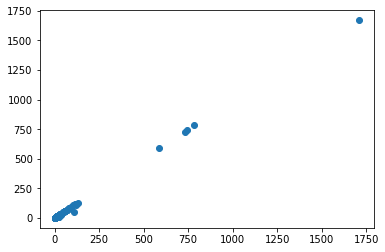

In [25]:
from matplotlib import pyplot as plt
plt.scatter(cek.NumMentions,cek.NumArticles)

In [93]:
# Korelasi
from pandas import set_option
Data = pd.DataFrame(df, columns = ['NumMentions','NumSources','NumArticles'])

set_option('display.width',100)
set_option('precision',3)

korelasi = Data.corr(method='pearson')
print(korelasi)

             NumMentions  NumSources  NumArticles
NumMentions        1.000       0.933        1.000
NumSources         0.933       1.000        0.934
NumArticles        1.000       0.934        1.000


In [96]:
cek.corr()

,IsRootEvent,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone
IsRootEvent,1.000,-0.104,-0.098,-0.094,-0.057,-0.081,0.006,-1.430e-02,0.005,3.167e-02
EventCode,-0.104,1.000,0.374,0.359,0.344,0.286,0.202,2.518e-01,0.203,1.584e-01
EventBaseCode,-0.098,0.374,1.000,0.999,0.944,-0.429,0.054,5.682e-02,0.052,-2.750e-03
EventRootCode,-0.094,0.359,0.999,1.000,0.949,-0.453,0.050,5.200e-02,0.048,-1.001e-02
QuadClass,-0.057,0.344,0.944,0.949,1.000,-0.500,0.056,5.599e-02,0.054,-2.187e-02
GoldsteinScale,-0.081,0.286,-0.429,-0.453,-0.500,1.000,0.138,1.583e-01,0.141,1.847e-01
NumMentions,0.006,0.202,0.054,0.050,0.056,0.138,1.000,9.331e-01,1.000,1.471e-02
NumSources,-0.014,0.252,0.057,0.052,0.056,0.158,0.933,1.000e+00,0.934,-8.357e-05
NumArticles,0.005,0.203,0.052,0.048,0.054,0.141,1.000,9.339e-01,1.000,1.490e-02
AvgTone,0.032,0.158,-0.003,-0.010,-0.022,0.185,0.015,-8.357e-05,0.015,1.000e+00


In [12]:
cek.NumMentions.quantile([0,0.25,0.50])

0.00    1.0
0.25    2.0
0.50    5.0
Name: NumMentions, dtype: float64

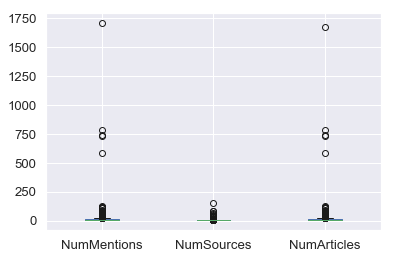

In [78]:
Data = pd.DataFrame(df, columns = ['NumMentions','NumSources','NumArticles'])
# //plt.boxplot(df.NumArticles)
Data.boxplot(column = ["NumMentions","NumSources","NumArticles"], return_type ='axes')

In [124]:
print('Data Min')
print(Data.min())
print()
print(Data.quantile([0.25]))
print(Data.median())
print(Data.quantile([0.75]))
print(Data.max())

Data Min
NumMentions    1
NumSources     1
NumArticles    1
dtype: int64

      NumMentions  NumSources  NumArticles
0.25          2.0         1.0          2.0
NumMentions    5.0
NumSources     1.0
NumArticles    5.0
dtype: float64
      NumMentions  NumSources  NumArticles
0.75         10.0         1.0         10.0
NumMentions    1711
NumSources      151
NumArticles    1671
dtype: int64


In [75]:
cek.skew()

IsRootEvent       -0.589392
EventCode          2.894804
EventBaseCode      1.334756
EventRootCode      1.390353
QuadClass          1.577316
GoldsteinScale    -0.673652
NumMentions       13.962734
NumSources        10.125771
NumArticles       13.812543
AvgTone           -0.357850
dtype: float64

In [22]:
cek.kurt()

IsRootEvent        -1.657941
EventCode           6.789225
EventBaseCode       1.795352
EventRootCode       1.899988
QuadClass           1.677374
GoldsteinScale      0.821986
NumMentions       228.107529
NumSources        128.660473
NumArticles       222.297395
AvgTone            -0.341734
dtype: float64

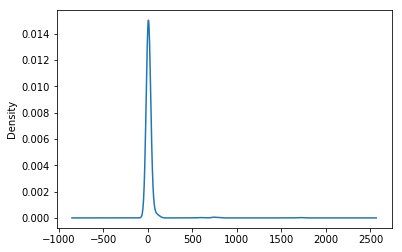

In [35]:
cek["NumMentions"].plot(kind="density")

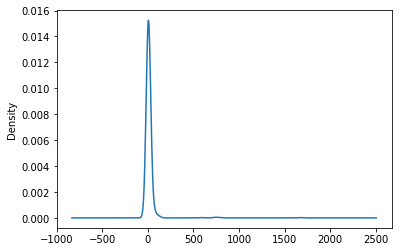

In [38]:
 cek["NumArticles"].plot(kind="density")

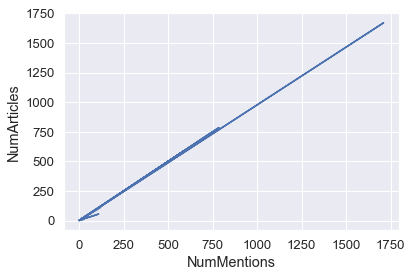

In [60]:
X = df.NumMentions
Y = df.NumArticles
plt.plot(X,Y)
plt.xlabel("NumMentions")
plt.ylabel("NumArticles")
plt.show()

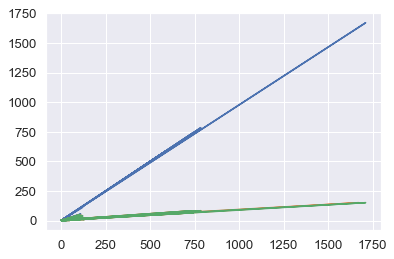

In [98]:
plt.plot(df.NumMentions,df.NumArticles)
plt.plot(df.NumArticles,df.NumSources)
plt.plot(df.NumMentions,df.NumSources)
plt.show()

ModuleNotFoundError: No module named 'stattools'